In [440]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [441]:
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(Url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


In [442]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [443]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [444]:
titanic['Age'].isnull().sum()

177

In [445]:
# Fill null value of Age column with its mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [446]:
titanic.isna().sum()
# ignoring and drop Cabin column in feature selection as most of the data is missing from the column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [447]:
# mapping Sex coulmn categorical data to numerical data
titanic['Sex'] = titanic['Sex'].map({'female':0, 'male':1})

In [448]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [449]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

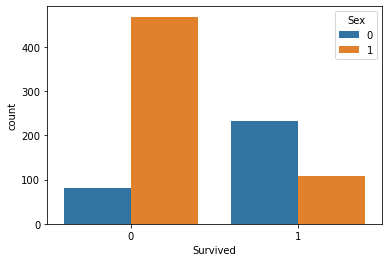

In [450]:
import seaborn as sns
sns.countplot(x='Survived', hue='Sex',data=titanic )

In [451]:
# In above plot, female passengers have survived more than male passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

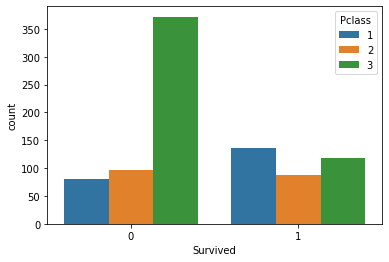

In [452]:
sns.countplot(x='Survived', hue='Pclass',data=titanic )

In [453]:
# In above plot, highest no of passengers who have travelled in class 3 have not survived 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

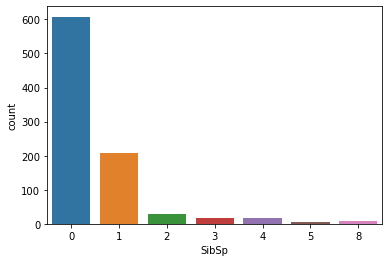

In [454]:
sns.countplot(x='SibSp',data=titanic )

In [455]:
# Majority of the passengers have no sibilings and spouse

In [456]:
# we are using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived or not.
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y = titanic['Survived']

In [457]:
# spliting data randomly
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 0)

In [458]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
[1, 0]


In [459]:
# train decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [460]:
#accuracy on train data
clf.score(x_train,y_train)

0.9791332263242376

In [461]:
#predictions with test data
y_pred = clf.predict(x_test)


In [462]:
# accuracy on test data 
clf.score(x_test,y_test)

0.7723880597014925

In [463]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[140,  28],
       [ 33,  67]], dtype=int64)

In [464]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       168
           1       0.71      0.67      0.69       100

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

